# CSMODEL Machine Project
![](assets/logo.png)
<br /> <br /> <br /> <br />
## Image Processing and Data Visualization of a Pokemon Dataset
<br /> <br />
**Section** S13 <br />
**Team Members:**
- Jose Lorenzo M. Cansana
- Gabriel Rasheed Jamalul
- Sean Michael Pe

<br /><br />
**SUBMIT DATE**

---

## 1. Introduction to Pokemon


## 2. Deep dive into Pokemon

## 3. The Research Questions

## 4. Overview on the Dataset

## 5. Exploring the Dataset

## 6. Finding the correlation of the dominant color of Pokemon sprites and their types

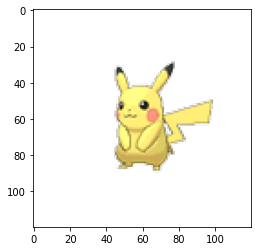

In [1]:
import matplotlib.image as img 
import matplotlib.pyplot as plt 
from scipy.cluster.vq import whiten 
from scipy.cluster.vq import kmeans2 
import pandas as pd 
import numpy as np
  
batman_image = img.imread('pokemon_dataset/images/pikachu.png') 
plt.imshow(batman_image)

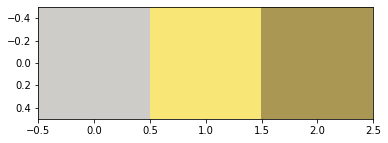

176     (0.8047965457194622, 0.8010298779593477, 0.787...
1041    (0.9762621759289482, 0.9093165500284083, 0.466...
542     (0.6689551173880731, 0.5954590795490643, 0.332...
dtype: object


(0.9762621759289482, 0.9093165500284083, 0.46641502644461547)

In [8]:
r = [] 
g = [] 
b = [] 

# multiply colors by 255, as rgb values in matplot.image saves pixels as rgb values scaled from 0 -> 1
for row in batman_image: 
    for temp_r, temp_g, temp_b, temp_alpha in row:
      if (temp_alpha != 0):
        r.append(temp_r * 255) 
        g.append(temp_g * 255) 
        b.append(temp_b * 255) 

batman_df = pd.DataFrame({'red' : r, 
                          'green' : g, 
                          'blue' : b}) 

# we whiten first before executing kmeans in order to normalize the data
batman_df['scaled_color_red'] = whiten(batman_df['red']) 
batman_df['scaled_color_blue'] = whiten(batman_df['blue']) 
batman_df['scaled_color_green'] = whiten(batman_df['green']) 

cluster_centers, clusters = kmeans2(batman_df[['scaled_color_red', 
                                    'scaled_color_green', 
                                    'scaled_color_blue']], 3) 

dominant_colors = [] 

# get standard deviation of each color
red_std, green_std, blue_std = batman_df[['red', 
                                          'green', 
                                          'blue']].std() 

# to generate dominant colors, remove 
for cluster_center in cluster_centers: 
    red_scaled, green_scaled, blue_scaled = cluster_center 
    dominant_colors.append(( 
        red_scaled * red_std / 255, 
        green_scaled * green_std / 255, 
        blue_scaled * blue_std / 255
    )) 

plt.imshow([dominant_colors])
plt.show()

# get the count of the pixels within each cluster
dominant = pd.Series(dominant_colors, np.bincount(clusters))

print(dominant)
dominant.max()
